<a href="https://colab.research.google.com/github/kimdongha723/kdh723/blob/main/BTC_predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pyupbit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.5/129.5 KB 7.4 MB/s eta 0:00:00


In [ ]:
!pip install pystan~=2.14
!pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.2/16.2 MB 42.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pystan: filename=pystan-2.19.1.1-cp39-cp39-linux_x86_64.whl size=61825590 sha256=8501a8d0a24d257a78e2db750c956f1537ce64a9d8f8966074efe4f4e49e08d1
  Stored in directory: /root/.cache/pip/wheels/b8/36/bf/7ec7e363f796373cea3eb9ea94e83f5bbbb586d2edbf7e3417
Successfully built pystan
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.0/64.0 KB 7.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fbprophet: filename=fbprophet-0.7.1-py3-none-any.whl size=9437046 sha256=708252de49d21ad580edde1aef564ebb0359935af0ef7cf234dbd58e1e226524
  Stored in directory: /root/.cache/pip/wheels/da/a4/bb/dbed5db92b2183a753dd96cc8a56706a61484ff3959988

In [ ]:
import pyupbit

In [ ]:
import pyupbit
import pandas as pd
import time

# Upbit API로 데이터 가져오기
df = pyupbit.get_ohlcv("KRW-MLK", interval="minute30", count=450)

# 인덱스를 날짜/시간 형식으로 변환
df.index = pd.to_datetime(df.index, format="%Y-%m-%d %H:%M:%S")

# 데이터프레임 출력
print(df)

                      open   high    low  close        volume         value
2023-04-04 06:00:00  380.0  381.0  375.0  377.0  2.734715e+05  1.031454e+08
2023-04-04 06:15:00  377.0  381.0  377.0  381.0  2.728968e+05  1.032963e+08
2023-04-04 06:30:00  381.0  386.0  379.0  382.0  5.923612e+05  2.269583e+08
2023-04-04 06:45:00  381.0  385.0  380.0  384.0  3.680104e+05  1.406817e+08
2023-04-04 07:00:00  384.0  390.0  383.0  384.0  1.122098e+06  4.342812e+08
...                    ...    ...    ...    ...           ...           ...
2023-04-08 21:15:00  679.0  681.0  675.0  680.0  4.636336e+06  3.143796e+09
2023-04-08 21:30:00  680.0  683.0  678.0  682.0  1.635710e+06  1.112965e+09
2023-04-08 21:45:00  682.0  691.0  681.0  683.0  3.011534e+06  2.064593e+09
2023-04-08 22:00:00  683.0  683.0  678.0  679.0  2.413771e+06  1.641636e+09
2023-04-08 22:15:00  679.0  680.0  676.0  677.0  8.224830e+05  5.574584e+08

[450 rows x 6 columns]


In [ ]:
#시간(ds)와 종가(y)값만 남김
df = df.reset_index()
df['ds'] = df['index']
df['y'] = df['close']
data = df[['ds','y']]
data

,ds,y
0,2023-04-04 06:00:00,377.0
1,2023-04-04 06:15:00,381.0
2,2023-04-04 06:30:00,382.0
3,2023-04-04 06:45:00,384.0
4,2023-04-04 07:00:00,384.0
...,...,...
445,2023-04-08 21:15:00,680.0
446,2023-04-08 21:30:00,682.0
447,2023-04-08 21:45:00,683.0
448,2023-04-08 22:00:00,679.0


In [ ]:
#prophet 불러옴
from fbprophet import Prophet

In [ ]:
#학습
model = Prophet()
model.fit(data)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


In [ ]:
#24시간 미래 예측
future = model.make_future_dataframe(periods=15, freq='H')
forecast = model.predict(future)

/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


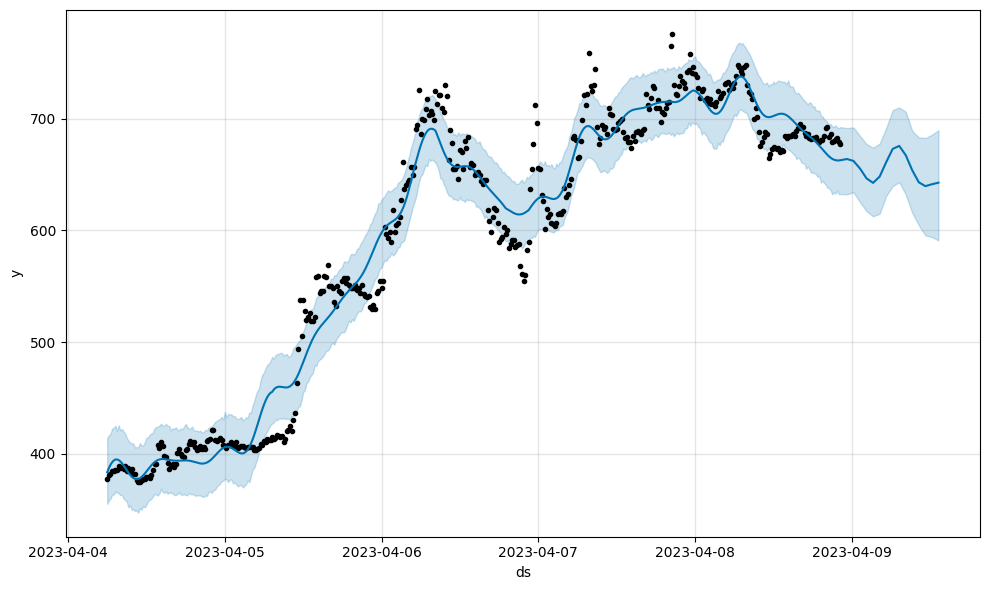

In [ ]:
#그래프1
fig1 = model.plot(forecast)

/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


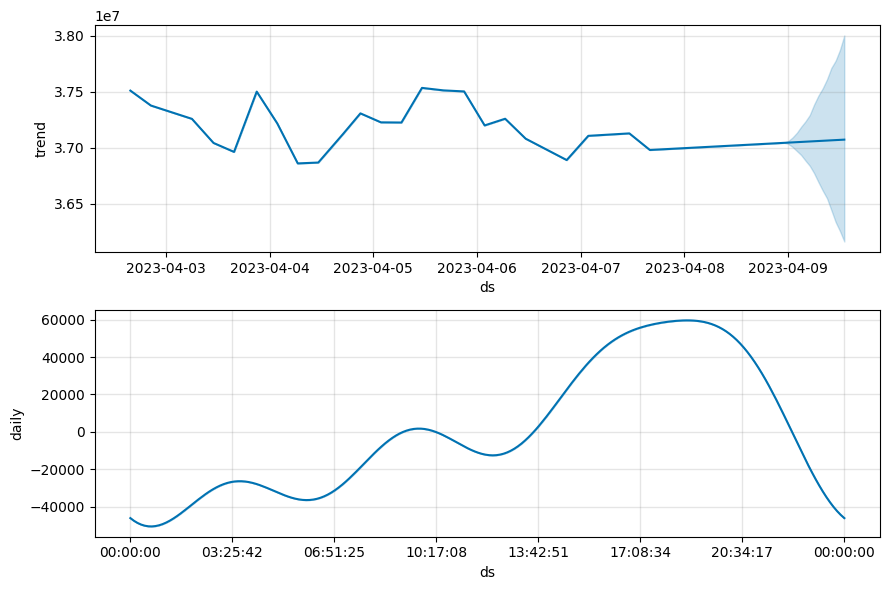

In [ ]:
 #그래프2
fig2 = model.plot_components(forecast)